## Abhishek Shekhar
### Assignment 4

In [2]:
#Importing all the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import sys
sys.setrecursionlimit(100000)
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing as sk_preprocessing

#### importing dataset in pandas dataframe

In [3]:
data = pd.read_excel('/Users/shekhara/Downloads/DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [4]:
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


### Setting Target value X and Y for prediction

In [5]:
Y = data['Class']
X = data.drop('Class', axis = 1)

#### Data visualization

Text(0, 0.5, 'Number of records')

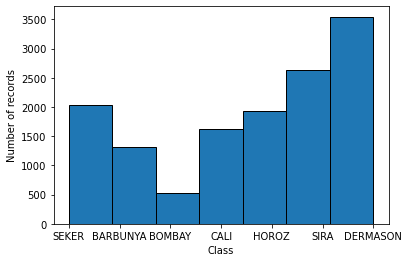

In [6]:
plt.hist(data["Class"], bins = 7, edgecolor = "black")
plt.xlabel("Class")
plt.ylabel("Number of records")

#####  Dividing the data into two subsets: training set (70% of the records from each class) and testing set (30% of the records from each class and different from the training data)

In [7]:
#Unequal distribution so stratify training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, stratify = Y) 

In [10]:
#ANN with 3 hidden layers layers with sizes 200,150 and 50 
clf = MLPClassifier(hidden_layer_sizes=(200,150,50), max_iter = 300, activation = 'relu', solver = 'adam')

In [11]:
#Fit ANN model
clf.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(200, 150, 50), max_iter=300)

In [12]:
#predicted values
Y_predictions = clf.predict(X_test)

In [13]:
#confusion matrix
cm = confusion_matrix(Y_predictions, Y_test)

In [14]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

In [15]:
#testing error
accuracy(cm)

0.14152791380999022

In [16]:
print(classification_report(Y_test, Y_predictions))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       397
      BOMBAY       0.00      0.00      0.00       157
        CALI       0.00      0.00      0.00       489
    DERMASON       0.00      0.00      0.00      1064
       HOROZ       0.14      1.00      0.25       578
       SEKER       0.00      0.00      0.00       608
        SIRA       0.00      0.00      0.00       791

    accuracy                           0.14      4084
   macro avg       0.02      0.14      0.04      4084
weighted avg       0.02      0.14      0.04      4084



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


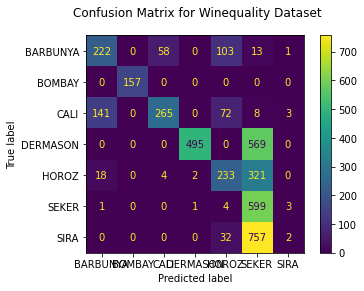

In [17]:
fig = plot_confusion_matrix(clf, X_test, Y_test, display_labels=clf.classes_)
fig.figure_.suptitle("Confusion Matrix for Winequality Dataset")
plt.show()